### Taken's embedding theorem states that if m is larger than or equal 2d + 1 (where d is the dimension of the original system's attractor). m is the embedding dimension or in other terms how many future snapshots we are squeezing into each *new* snapshot

The requirements of the theorem
- The dynamical system is deterministic
- The observation function (how you measure the system) is "generic"
- You have the suffiecent embedding dimensions

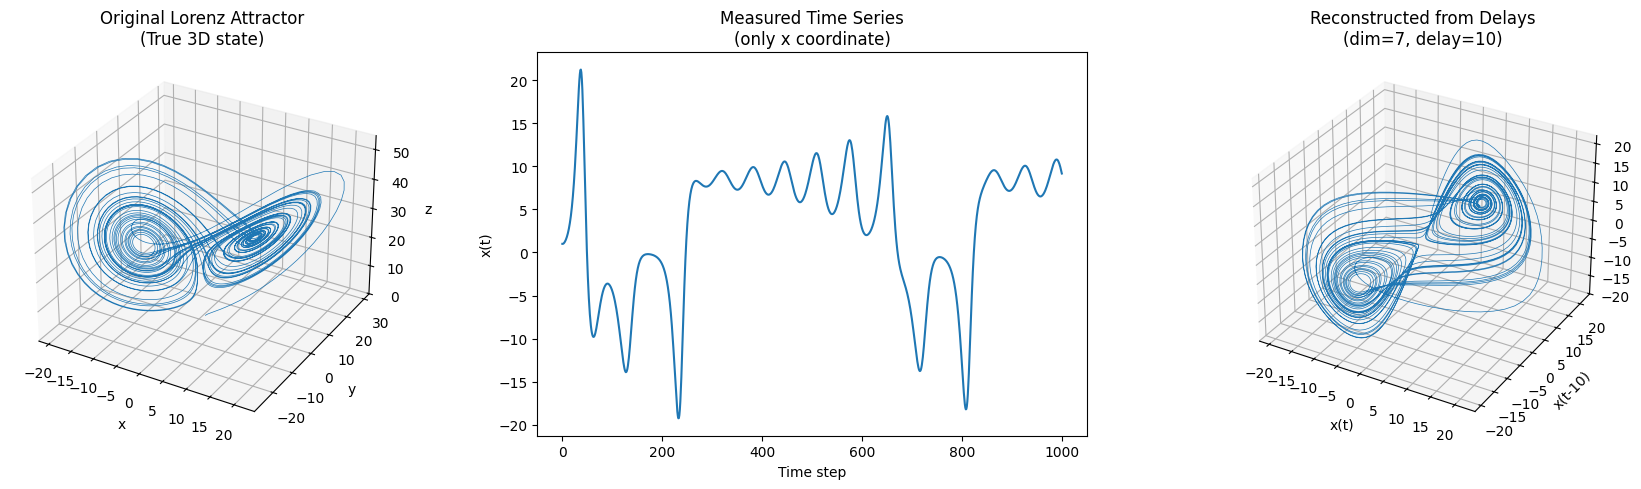

Try changing:
- delay: smaller (5) or larger (20)
- dim: try 2, 3, 4, or even 7 (the theoretical 2n+1)

Notice how the shape is similar to the original!


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate a simple Lorenz system
def lorenz(state, sigma=10, rho=28, beta=8/3):
    x, y, z = state
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    return np.array([dx, dy, dz])

# Simulate the system
dt = 0.01
T = 50  # total time
steps = int(T / dt)

# Initial condition
state = np.array([1.0, 1.0, 1.0])
trajectory = np.zeros((steps, 3))

# Run simulation (simple Euler method)
for i in range(steps):
    trajectory[i] = state
    state = state + lorenz(state) * dt

# Extract just x coordinate (our "measurement")
x_measured = trajectory[:, 0]

# TAKENS EMBEDDING FUNCTION
def delay_embed(timeseries, delay, dimension):
    """
    timeseries: 1D array of measurements
    delay: time steps between coordinates
    dimension: embedding dimension (how many delays)
    """
    N = len(timeseries)
    # Number of embedded vectors we can make
    num_vectors = N - (dimension - 1) * delay
    
    # y(t) = [x(t), x(t+τ), x(t+2τ), ..., x(t+(m-1)τ)]
    # Where τ is the delay and m is the embedding dimension
    embedded = np.zeros((num_vectors, dimension))
    for i in range(num_vectors):
        for j in range(dimension):
            embedded[i, j] = timeseries[i + j * delay]
    
    return embedded

# Try different embeddings
delay = 10  # time steps
dim = 7     # embedding dimension

reconstructed = delay_embed(x_measured, delay, dim)

# PLOT RESULTS
fig = plt.figure(figsize=(18, 5))

# Original attractor (we know the true 3D state)
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], linewidth=0.5)
ax1.set_title('Original Lorenz Attractor\n(True 3D state)')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')

# Time series (what we measured)
ax2 = fig.add_subplot(132)
ax2.plot(x_measured[:1000])  # just first 1000 points
ax2.set_title('Measured Time Series\n(only x coordinate)')
ax2.set_xlabel('Time step')
ax2.set_ylabel('x(t)')

# Reconstructed attractor from delays
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot(reconstructed[:, 0], reconstructed[:, 1], reconstructed[:, 2], linewidth=0.5)
ax3.set_title(f'Reconstructed from Delays\n(dim={dim}, delay={delay})')
ax3.set_xlabel('x(t)')
ax3.set_ylabel(f'x(t-{delay})')
ax3.set_zlabel(f'x(t-{2*delay})')

plt.tight_layout()
plt.show()

# EXPERIMENT: Try different parameters
print("Try changing:")
print("- delay: smaller (5) or larger (20)")
print("- dim: try 2, 3, 4, or even 7 (the theoretical 2n+1)")
print("\nNotice how the shape is similar to the original!")

In [4]:
x_measured.shape, reconstructed.shape

((5000,), (4940, 7))